In [2]:
import time
import urllib.request
import pandas
from sklearn.decomposition import LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups

https://medium.com/mlreview/topic-modeling-with-scikit-learn-e80d33668730

# Setup

In [3]:
n_comp = 10
no_top_words = 10
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [4]:
text = urllib.request.urlopen("https://www.gutenberg.org/files/215/215-0.txt")
linelist = []
for line in text:
    txt = line.rstrip().decode("utf-8")
    if len(txt.split()) > 3:
        linelist.append(txt)

# Text Feature Engineering

### Count Vectorizer

In [5]:
cv=CountVectorizer(stop_words='english')
tf = cv.fit_transform(linelist)
tf_feature_names = cv.get_feature_names()

In [6]:
lda = LatentDirichletAllocation(n_components=n_comp, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
men good come frozen small comes pounds say carried sound
Topic 1:
water nose ground blood wild trademark salt foundation won man
Topic 2:
man life eyes dog said love foundation new literary archive
Topic 3:
work things forest hand place paragraph set sled received charge
Topic 4:
gutenberg project tm did thornton knew electronic john club work
Topic 5:
night half snow morning head times brought thornton man sleep
Topic 6:
buck dogs day time came like long sled till days
Topic 7:
spitz buck way ran including sprang went sun pain valley
Topic 8:
donations great states terms united thornton information agreement copy sir
Topic 9:
break grew bristling chest requirements head heem edge ice timber


In [7]:
nmf = NMF(n_components= n_comp, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tf)
display_topics(nmf, tf_feature_names, no_top_words)

Topic 0:
buck françois like saw head dat half love stood dave
Topic 1:
gutenberg project tm work electronic works license literary foundation access
Topic 2:
dogs sled team way wanted outside half mercedes perrault fourteen
Topic 3:
thornton john head camp feet long great hand shook face
Topic 4:
man red sweater hairy saw sled club life throat hurled
Topic 5:
did know work like long till read went newspapers things
Topic 6:
time spitz away days went long good life half old
Topic 7:
dog sol leks sled knew françois driver old half perrault
Topic 8:
day camp days night like end long trail miles sun
Topic 9:
men came françois saw kept woman charles sled world camp


### TF-IDF

In [10]:
no_features = 1000
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tfidf = tfidf_vectorizer.fit_transform(linelist)
tfidf_feature_names = tfidf_vectorizer.get_feature_names()

In [11]:
lda = LatentDirichletAllocation(n_components=n_comp, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tfidf)
display_topics(lda, tfidf_feature_names, no_top_words)

Topic 0:
life did men came know buck laws world death lay
Topic 1:
great camp hands valley sleep hunting white effort requirements hans
Topic 2:
dog states buck time strength united dogs left wild driver
Topic 3:
buck françois went body ice team mates way bank rest
Topic 4:
end matter nose come blood air ground land timber ebooks
Topic 5:
project gutenberg tm head work foundation works electronic long agreement
Topic 6:
thornton john till hal pete state sounding said frozen patience
Topic 7:
man feet things love new eyes dogs legs strange heard
Topic 8:
half buck spitz like hand old sol leks stood face
Topic 9:
day days night sled trail forest forth perrault buck morning


In [12]:
nmf = NMF(n_components= n_comp, random_state=1, alpha=.1, l1_ratio=.5, init='nndsvd').fit(tfidf)
display_topics(nmf, tfidf_feature_names, no_top_words)

Topic 0:
buck françois went like half love mates stood head saw
Topic 1:
gutenberg project tm work electronic works license literary foundation trademark
Topic 2:
dogs team outside way sled harness perrault tired mercedes fourteen
Topic 3:
man red sweater hairy hand hurled love brought saw throat
Topic 4:
did know like day knew long share went eyes till
Topic 5:
thornton john head shook great feet sat camp long hal
Topic 6:
life new saved like mates passed ecstasy forest song half
Topic 7:
men came gone carried sought old françois kept outfit need
Topic 8:
time spitz good tried away days left old broke dropped
Topic 9:
dog driver food work husky old eh house lead knew


### Natural Language Toolkit

In [10]:
import nltk
from nltk.corpus import stopwords

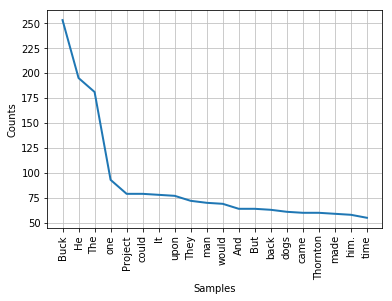

In [19]:
tokens = []
for line in linelist:
    tokens.extend(line.split())
sr= stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq = nltk.FreqDist(clean_tokens)
freq.plot(20, cumulative=False)